# Changing directory structure

In [6]:
import os
import shutil
import glob

In [7]:
train_dir= r"C:\Users\inesa\Desktop\Cours\Semestre 3\DL\arabic_handwritten_data\data\train_data"

In [8]:
test_dir=r"C:\Users\inesa\Desktop\Cours\Semestre 3\DL\arabic_handwritten_data\data\test_data"

In [4]:
def movefile(srcDir, dstDir, i ):
    # Check if both the are directories
    if os.path.isdir(srcDir) and os.path.isdir(dstDir) :
        # Iterate over all the files in source directory
        for filePath in glob.glob(srcDir + '\*_label_'+ str(i+1)+'.png'):
            # Move each file to destination Directory
            shutil.move(filePath, dstDir);
    else:
        print("srcDir & dstDir should be Directories")

In [207]:
for i in range(len(arabic_mnist_labels)):
    directory= arabic_mnist_labels[i]
    path= os.path.join(train_dir, directory)
    path2= os.path.join(test_dir , directory)
    os.mkdir(path) 
    os.mkdir(path2)
    movefile(train_dir,path,i)  
    movefile(test_dir,path2,i)

In [9]:
alef="alef"
alef_dir=os.path.join(train_dir,alef)
print('total training rock images:', len(os.listdir(alef_dir)))

total training rock images: 480


In [10]:
beh="beh"
beh_dir=os.path.join(train_dir,beh)
print('total training rock images:', len(os.listdir(beh_dir)))

total training rock images: 480


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

In [12]:
alef_files = os.listdir(alef_dir)

beh_files = os.listdir(beh_dir)


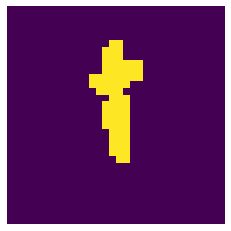

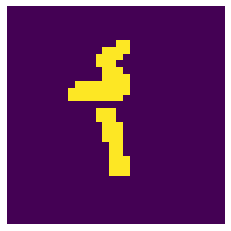

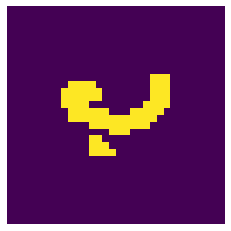

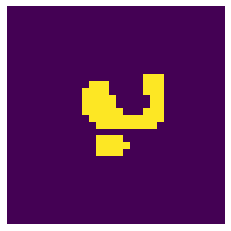

In [13]:
next_alef = [os.path.join(alef_dir, fname) 
                for fname in alef_files[pic_index-2:pic_index]]
next_beh = [os.path.join(beh_dir, fname) 
                for fname in beh_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_alef+next_beh):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# With Data Augmentation

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [15]:
TRAINING_DIR = "C:/Users/inesa/Desktop/Cours/Semestre 3/DL/arabic_handwritten_data/data/train_data/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Users/inesa/Desktop/Cours/Semestre 3/DL/arabic_handwritten_data/data/test_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 13440 images belonging to 28 classes.
Found 3360 images belonging to 28 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150,3 )),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

# Without Data Augmentation

In [ ]:
train_ds = get_dataset(train_dir).shuffle(buffer_size=batch_size*10).batch(batch_size)
valid_ds = get_dataset(test_dir).batch(batch_size)

In [ ]:
history = model.fit(train_ds, epochs=25, steps_per_epoch=20, validation_data = valid_ds, verbose = 1, validation_steps=3)


# Predicting 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)